In [1]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

In [2]:
data = pd.read_csv("backpain.csv")
# copying data to another varaible to avoid any changes to original data
backpain = data.copy()
#View a snippet of the data
backpain.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


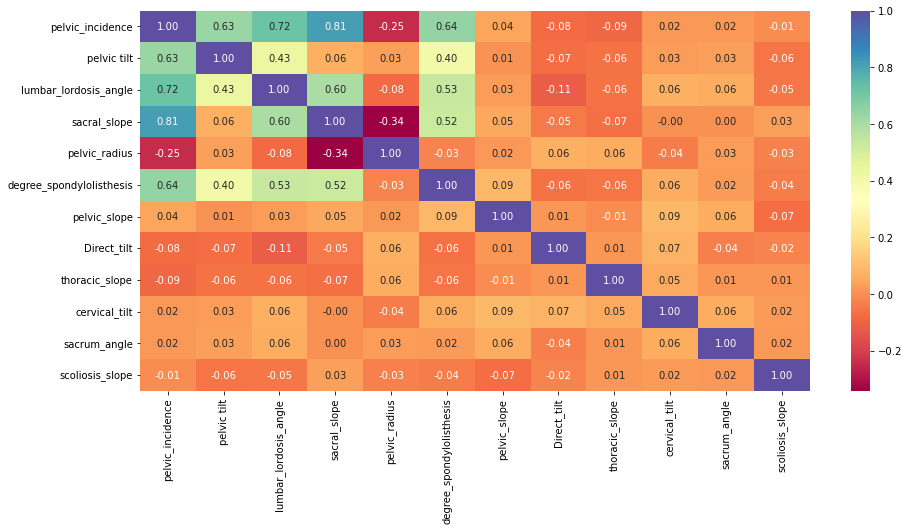

In [3]:
plt.figure(figsize = (15,7))
sns.heatmap(backpain.corr(), annot= True, cmap = 'Spectral', fmt = '.2f');

In [4]:
replaceStruct = {
                "Status":     {"Abnormal": 1, "Normal": 0 }
                    }
backpain=backpain.replace(replaceStruct)
backpain.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


In [7]:
X = backpain.drop(["Status"], axis=1)
y = backpain["Status"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
y_train.value_counts(normalize= True)

1    0.663594
0    0.336406
Name: Status, dtype: float64

In [15]:
model = DecisionTreeClassifier( max_depth=1,random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=1)

In [16]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [17]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [18]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.778802,0.6875,0.970588,0.804878


In [20]:
model2 = DecisionTreeClassifier( max_depth=2,random_state=1)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [21]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.83871,0.888889,0.870748,0.879725


In [22]:
model5 = DecisionTreeClassifier( max_depth=5,random_state=1)
model5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [23]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model5, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.963134,0.965278,0.978873,0.972028


In [24]:
model8 = DecisionTreeClassifier( max_depth=8,random_state=1)
model8.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [25]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model8, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [30]:

print(
    pd.DataFrame(
        model8.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                               Imp
degree_spondylolisthesis  0.412395
pelvic tilt               0.118683
pelvic_radius             0.111555
sacral_slope              0.104975
Direct_tilt               0.058833
cervical_tilt             0.058276
scoliosis_slope           0.041630
thoracic_slope            0.038605
sacrum_angle              0.030965
pelvic_slope              0.013762
pelvic_incidence          0.010322
lumbar_lordosis_angle     0.000000


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [34]:
estimator = DecisionTreeClassifier(random_state= 1)

#Grid Parameters to iterate through
parameters = {
    'max_depth': [5,10,15, None],
    'criterion': ['gini','entropy'],
    'splitter': ['best','random']
    }

#Type of scoring to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring= acc_scorer, cv = 3)
grid_obj = grid_obj.fit(X_train, y_train)

#select and set the best combination of parameters
estimator = grid_obj.best_estimator_
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1,
                       splitter='random')

In [36]:
def get_recall_score(model):
    """
    model: classifier to predict values of X
    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set :", metrics.recall_score(y_train, pred_train))
    print("Recall on test set :", metrics.recall_score(y_test, pred_test))

In [41]:
decision_tree_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.967742,0.979167,0.972414,0.975779


In [42]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model8, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [43]:
decision_tree_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.741935,0.80303,0.828125,0.815385


In [44]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model8, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.774194,0.787879,0.881356,0.832
